In [1]:
import numpy as np
import scipy as sp
import datajoint as dj
import matplotlib.pyplot as plt

In [2]:
dj.config['database.host'] = 'mesoscale-activity.datajoint.io'

In [3]:
from pipeline import lab, experiment, tracking, ephys, psth
from pipeline import plot
from pipeline.plot import behavior_plot, unit_characteristic_plot

Please enter DataJoint username:  thinh
Please enter DataJoint password:  ·····················


Connecting thinh@mesoscale-activity.datajoint.io:3306


# ***lab*** diagram

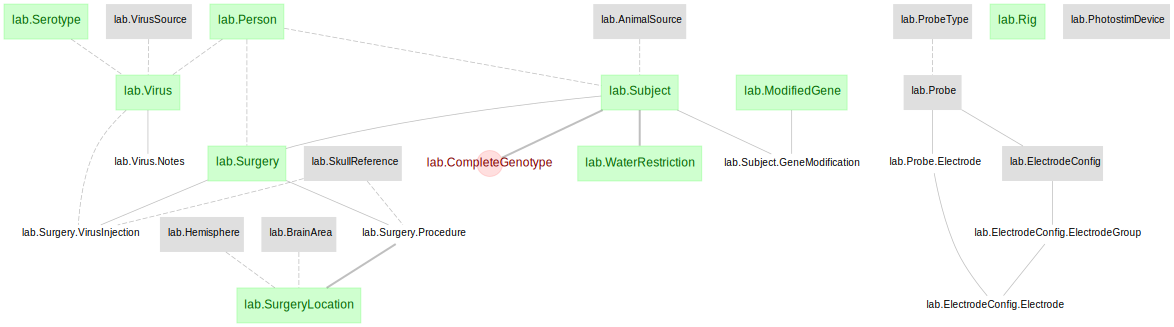

In [33]:
dj.ERD(lab)

# Top level ***behavior*** diagram

In [6]:
behav_erd = (dj.ERD(experiment.SessionTrial) - 1 
             + (dj.ERD(experiment.BrainLocation)-1) 
             + (dj.ERD(experiment.BehaviorTrial) + 1 - 1) 
             + (dj.ERD(experiment.PhotostimTrial) + 1 - 1)) 

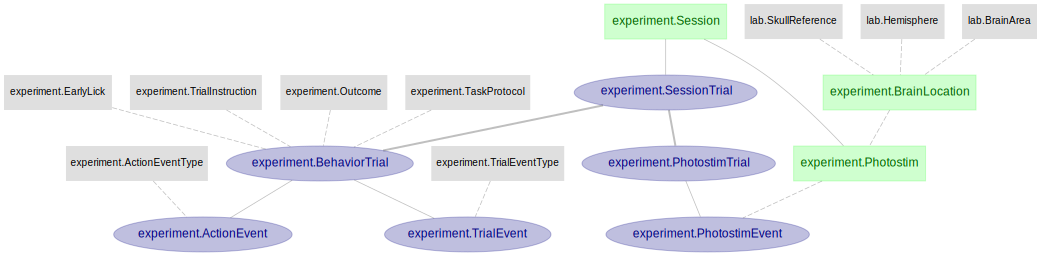

In [7]:
behav_erd

# Top level ***ephys*** diagram

In [25]:
ephys_erd = ((dj.ERD(ephys.Unit)-2) + dj.ERD(ephys.TrialSpikes)
             + (dj.ERD(experiment.BrainLocation)-1)
             + dj.ERD(ephys.ProbeInsertion.InsertionLocation)
             + dj.ERD(psth.UnitSelectivity) + (dj.ERD(psth.PeriodSelectivity) - 1))

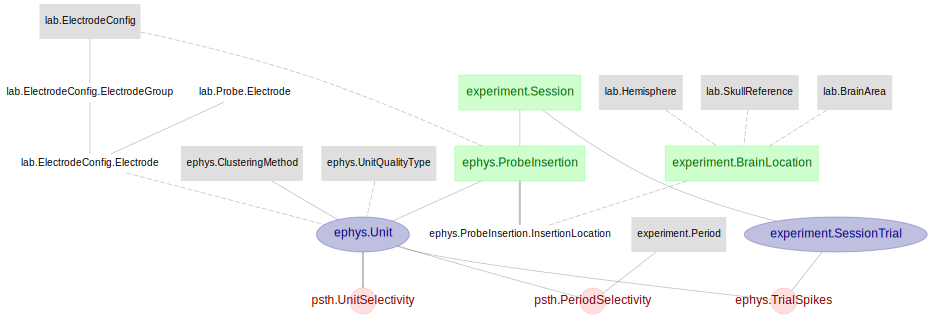

In [26]:
ephys_erd

# ***unit*** diagram

In [28]:
unit_erd = (dj.ERD(ephys.Unit) - 1) + (dj.ERD(ephys.Unit) + 1)

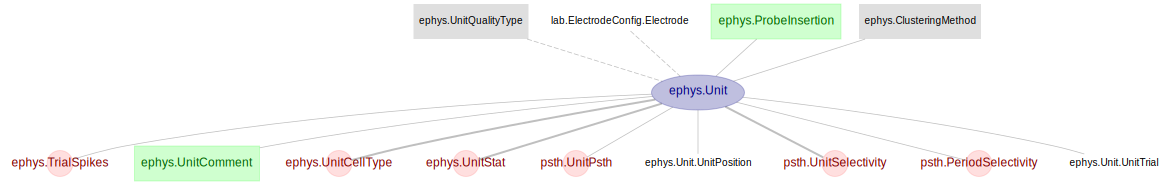

In [27]:
unit_erd

# Getting the definition of a table - .describe()

In [37]:
ephys.Unit.describe();

# Sorted unit
-> ephys.ProbeInsertion
-> ephys.ClusteringMethod
unit                 : smallint                     
---
unit_uid             : int                          # unique across sessions/animals
-> ephys.UnitQualityType
-> lab.ElectrodeConfig.Electrode
unit_posx            : double                       # (um) estimated x position of the unit relative to probe's (0,0)
unit_posy            : double                       # (um) estimated y position of the unit relative to probe's (0,0)
spike_times          : longblob                     # (s) from the start of the first data point used in clustering
unit_amp             : double                       
unit_snr             : double                       
waveform             : blob                         # average spike waveform



# Browsing of data - queries

In [8]:
lab.Subject()

subject_id institution 6 digit animal ID,username,cage_number institution 6 digit animal ID,date_of_birth format: yyyy-mm-dd,sex,animal_source
412330,daveliu,154522,2017-12-05,M,Jackson labs
412753,daveliu,154570,2017-12-07,M,Jackson labs
413950,daveliu,155585,2017-12-21,M,Jackson labs
418279,daveliu,155593,2018-02-02,M,Jackson labs
428047,daveliu,158986,2018-05-16,M,Jackson labs
428048,daveliu,158987,2018-05-16,M,Jackson labs
432570,daveliu,161126,2018-06-28,M,Jackson labs
432572,daveliu,161125,2018-06-28,M,Jackson labs
432998,daveliu,160920,2018-07-02,M,Jackson labs
435884,daveliu,161908,2018-08-06,M,Jackson labs


### Query one subject

In [11]:
# restrict by string
lab.Subject & 'subject_id=412330'

subject_id institution 6 digit animal ID,username,cage_number institution 6 digit animal ID,date_of_birth format: yyyy-mm-dd,sex,animal_source
412330,daveliu,154522,2017-12-05,M,Jackson labs


In [12]:
# restrict by dictionary
lab.Subject & {'subject_id': 412330}

subject_id institution 6 digit animal ID,username,cage_number institution 6 digit animal ID,date_of_birth format: yyyy-mm-dd,sex,animal_source
412330,daveliu,154522,2017-12-05,M,Jackson labs


In [13]:
lab.Subject & {'sex': 'm'}

subject_id institution 6 digit animal ID,username,cage_number institution 6 digit animal ID,date_of_birth format: yyyy-mm-dd,sex,animal_source
412330,daveliu,154522,2017-12-05,M,Jackson labs
412753,daveliu,154570,2017-12-07,M,Jackson labs
413950,daveliu,155585,2017-12-21,M,Jackson labs
418279,daveliu,155593,2018-02-02,M,Jackson labs
428047,daveliu,158986,2018-05-16,M,Jackson labs
428048,daveliu,158987,2018-05-16,M,Jackson labs
432570,daveliu,161126,2018-06-28,M,Jackson labs
432572,daveliu,161125,2018-06-28,M,Jackson labs
432998,daveliu,160920,2018-07-02,M,Jackson labs
435884,daveliu,161908,2018-08-06,M,Jackson labs


### Fetch back the subject key

In [14]:
subj_397853 = (lab.Subject & {'subject_id': 412330}).fetch1('KEY')  # "fetch1()" because we know there's only one

In [15]:
subj_397853

{'subject_id': 412330}

In [16]:
male_subjs = (lab.Subject & {'sex': 'm'}).fetch('KEY')  # "fetch()" for fetching multiple

In [17]:
male_subjs

[{'subject_id': 412330},
 {'subject_id': 412753},
 {'subject_id': 413950},
 {'subject_id': 418279},
 {'subject_id': 428047},
 {'subject_id': 428048},
 {'subject_id': 432570},
 {'subject_id': 432572},
 {'subject_id': 432998},
 {'subject_id': 435884},
 {'subject_id': 439457},
 {'subject_id': 440010}]

# Browsing of sessions

In [18]:
# Get sessions with units
sessions = experiment.Session & ephys.Unit
sessions

subject_id institution 6 digit animal ID,session session number,session_date,username,rig
412330,15,2018-07-16,daveliu,RRig
412753,41,2018-07-10,daveliu,RRig
413950,20,2018-10-22,daveliu,RRig
413950,21,2018-10-23,daveliu,RRig
432570,13,2018-10-22,daveliu,RRig
432572,9,2018-11-20,daveliu,RRig
432572,10,2018-11-21,daveliu,RRig
432572,14,2018-11-25,daveliu,RRig
432572,15,2018-11-26,daveliu,RRig
432998,16,2019-01-13,daveliu,RRig


In [19]:
# List all sessions and the ProbeInsertion counts for each
sessions = sessions.aggr(ephys.ProbeInsertion, probe_insert_count='count(*)')
sessions

subject_id institution 6 digit animal ID,session session number,probe_insert_count calculated attribute
412330,15,2
412753,41,2
413950,20,2
413950,21,2
432570,13,1
432572,9,1
432572,10,1
432572,14,2
432572,15,2
432998,16,1


In [20]:
# query 1 session
experiment.Session & {'session': 15, 'subject_id': 412330}

subject_id institution 6 digit animal ID,session session number,session_date,username,rig
412330,15,2018-07-16,daveliu,RRig


In [31]:
# get session key
session_key = (experiment.Session & {'session': 15, 'subject_id': 412330}).fetch1('KEY')

# Browsing of units for this session
#### Keep in mind that units may come from different ***ProbeInsertion***

In [32]:
ephys.Unit & session_key

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_name user friendly name,electrode_group electrode group,electrode electrode,"unit_posx (um) estimated x position of the unit relative to probe's (0,0)","unit_posy (um) estimated y position of the unit relative to probe's (0,0)",spike_times (s) from the start of the first data point used in clustering,unit_amp,unit_snr,waveform average spike waveform
412330,15,1,jrclust,1,1,all,15131808323,npx_first384,0,2,22.84069061279297,3.5793862342834473,=BLOB=,45.626198,4.943878,=BLOB=
412330,15,1,jrclust,2,2,all,15131808323,npx_first384,0,4,28.308536529541016,16.114704132080078,=BLOB=,221.73726,10.427825,=BLOB=
412330,15,1,jrclust,3,3,all,15131808323,npx_first384,0,3,3.5463621616363525,21.084684371948242,=BLOB=,113.18932,3.5160778,=BLOB=
412330,15,1,jrclust,4,4,all,15131808323,npx_first384,0,3,5.110103607177734,23.70351791381836,=BLOB=,143.80943,4.6012316,=BLOB=
412330,15,1,jrclust,5,5,all,15131808323,npx_first384,0,2,30.303544998168945,2.7377524375915527,=BLOB=,115.72967,5.8627715,=BLOB=
412330,15,1,jrclust,6,6,all,15131808323,npx_first384,0,2,31.89282989501953,3.302384376525879,=BLOB=,69.38274,5.770551,=BLOB=
412330,15,1,jrclust,7,7,good,15131808323,npx_first384,0,3,7.404426574707031,23.034358978271484,=BLOB=,427.98932,13.06085,=BLOB=
412330,15,1,jrclust,8,8,good,15131808323,npx_first384,0,3,3.042593002319336,19.83121109008789,=BLOB=,290.44583,7.659547,=BLOB=
412330,15,1,jrclust,9,9,all,15131808323,npx_first384,0,3,9.308884620666504,18.009071350097656,=BLOB=,198.76405,6.716082,=BLOB=
412330,15,1,jrclust,10,10,all,15131808323,npx_first384,0,4,28.376956939697266,16.088905334472656,=BLOB=,152.2732,6.9219966,=BLOB=


In [45]:
good_units = ephys.Unit & session_key & {'unit_quality': 'good'}
good_units

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_name user friendly name,electrode_group electrode group,electrode electrode,"unit_posx (um) estimated x position of the unit relative to probe's (0,0)","unit_posy (um) estimated y position of the unit relative to probe's (0,0)",spike_times (s) from the start of the first data point used in clustering,unit_amp,unit_snr,waveform average spike waveform
412330,15,1,jrclust,7,7,good,15131808323,npx_first384,0,3,7.404426574707031,23.034358978271484,=BLOB=,427.98932,13.06085,=BLOB=
412330,15,1,jrclust,8,8,good,15131808323,npx_first384,0,3,3.042593002319336,19.83121109008789,=BLOB=,290.44583,7.659547,=BLOB=
412330,15,1,jrclust,12,12,good,15131808323,npx_first384,0,4,32.344425201416016,16.04660415649414,=BLOB=,225.7262,11.071866,=BLOB=
412330,15,1,jrclust,18,18,good,15131808323,npx_first384,0,11,6.8651227951049805,96.26170349121094,=BLOB=,296.88046,12.259954,=BLOB=
412330,15,1,jrclust,34,34,good,15131808323,npx_first384,0,15,2.5680699348449707,142.50448608398438,=BLOB=,231.31876,8.671488,=BLOB=
412330,15,1,jrclust,35,35,good,15131808323,npx_first384,0,21,15.262028694152832,201.51885986328125,=BLOB=,241.5961,7.549255,=BLOB=
412330,15,1,jrclust,38,38,good,15131808323,npx_first384,0,18,46.01060485839844,161.53170776367188,=BLOB=,330.37268,11.911634,=BLOB=
412330,15,1,jrclust,53,53,good,15131808323,npx_first384,0,25,16.018810272216797,239.96383666992188,=BLOB=,229.43436,8.782874,=BLOB=
412330,15,1,jrclust,57,57,good,15131808323,npx_first384,0,27,4.520862102508545,264.2856750488281,=BLOB=,546.9844,21.392849,=BLOB=
412330,15,1,jrclust,58,58,good,15131808323,npx_first384,0,27,0.4453451633453369,259.92333984375,=BLOB=,305.38354,12.988269,=BLOB=


## Unit selectivity

In [46]:
psth.UnitSelectivity & good_units

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_selectivity
412330,15,1,jrclust,7,contra-selective
412330,15,1,jrclust,8,contra-selective
412330,15,1,jrclust,12,contra-selective
412330,15,1,jrclust,18,contra-selective
412330,15,1,jrclust,34,non-selective
412330,15,1,jrclust,35,non-selective
412330,15,1,jrclust,38,contra-selective
412330,15,1,jrclust,53,contra-selective
412330,15,1,jrclust,57,non-selective
412330,15,1,jrclust,58,non-selective


### Pick one unit

In [48]:
unit_key = (psth.UnitSelectivity & good_units & 'unit=7').fetch1('KEY')
unit_key                                                                 

{'subject_id': 412330,
 'session': 15,
 'insertion_number': 1,
 'clustering_method': 'jrclust',
 'unit': 7}

### Unit PSTH

In [49]:
upsth_erd = (dj.ERD(psth.UnitPsth) - 1)

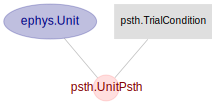

In [50]:
upsth_erd

In [51]:
psth.TrialCondition()

trial_condition_name user-friendly name of condition,trial_condition_hash trial condition hash - hash of func and arg,trial_condition_func trial retrieval function,trial_condition_arg trial retrieval arguments
all_noearlylick_both_alm_nostim,9dbe618e8775ba08855a779ddb98e469,_get_trials_exclude_stim,=BLOB=
all_noearlylick_both_alm_nostim_left,098bfce10178eadb5821d7cdbd22321d,_get_trials_exclude_stim,=BLOB=
all_noearlylick_both_alm_nostim_right,6263635bae2d5185640fd58aeaae8632,_get_trials_exclude_stim,=BLOB=
all_noearlylick_both_alm_stim,910cfcd39d7a1752616d38a009e23434,_get_trials_include_stim,=BLOB=
all_noearlylick_both_alm_stim_left,b19705e539f7b94bf1d620f06c52c935,_get_trials_include_stim,=BLOB=
all_noearlylick_both_alm_stim_right,b51fdd205268f30ffdf1e5e85c67fe24,_get_trials_include_stim,=BLOB=
good_noearlylick_hit,736552c7bdc75be3adea79297dcedcce,_get_trials_exclude_stim,=BLOB=
good_noearlylick_left_hit,6210474348cdfd0cdd9cc35c6b8b7238,_get_trials_exclude_stim,=BLOB=
good_noearlylick_left_miss,03c3f0aabc85e62bf396479206a37546,_get_trials_exclude_stim,=BLOB=
good_noearlylick_right_hit,4ac0ca959157d01adfc948eefd9561e8,_get_trials_exclude_stim,=BLOB=


In [52]:
unit_psth = psth.UnitPsth * psth.TrialCondition & unit_key & 'trial_condition_name = "good_noearlylick_hit"'

In [53]:
psth_trace, edges = unit_psth.fetch1('unit_psth')

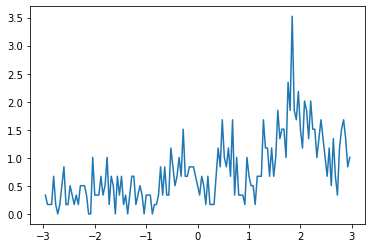

In [54]:
plt.plot(edges[1:], psth_trace)

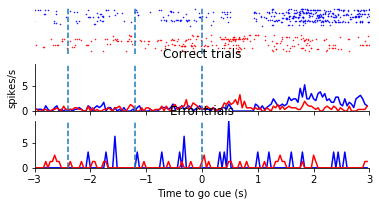

In [55]:
plot.unit_psth(unit_key)

# ================================================